In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

%matplotlib inline
pd.set_option('max_colwidth',1000)
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
# Load the loan data
df = pd.read_pickle('data_cleaned.pkl')
df.reset_index(drop=True, inplace=True)

In [3]:
# Categorical features from data-cleanup.ipynb
cat_features = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
                'purpose', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method']

for y in cat_features:
    # print(y + " has " + str(len(df[y].unique())) + " unique values")
    df = df.join(pd.get_dummies(df[y], prefix=y))
    df.drop(y, axis=1, inplace=True)

# Remove int_rate also
df.drop('int_rate', axis=1, inplace=True)

In [4]:
# Encode the loan_status to numerical values
# Fully Paid = 1
# Charged Off = 0
df['loan_status'] = df['loan_status'].apply(lambda x: int(x == 'Fully Paid'))

In [5]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
count,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,8.306850e+05,830685.000000,830685.000000,830685.000000,830685.000000,...,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000
mean,14325.615727,14312.102722,14279.615080,41.796970,436.406142,7.529807e+04,0.793832,518.830457,17.395740,0.307000,...,0.022308,0.012747,0.004003,0.002244,0.504204,0.495796,0.994908,0.005092,0.998617,0.001383
std,8509.996557,8503.337725,8508.362095,10.272417,255.953656,6.557081e+04,0.404553,314.240924,8.984933,0.857069,...,0.147684,0.112182,0.063140,0.047317,0.499983,0.499983,0.071178,0.071178,0.037166,0.037166
min,500.000000,500.000000,0.000000,36.000000,4.000000,0.000000e+00,0.000000,7.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,7975.000000,36.000000,251.000000,4.520000e+04,1.000000,234.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,36.000000,377.000000,6.500000e+04,1.000000,481.000000,17.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,36.000000,576.000000,9.000000e+04,1.000000,823.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,40000.000000,40000.000000,40000.000000,60.000000,1714.000000,9.550000e+06,1.000000,999.000000,999.000000,39.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Correlation Analysis
# most correlated features
corrmat = df.corr()
# top_corr_features = corrmat.index[abs(corrmat["int_rate"])>0.5]
# plt.figure(figsize=(100,100))
# g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest")
    ax1.grid(True)
    plt.title('Feature Correlation')
    # labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    # ax1.set_xticklabels(labels,fontsize=6)
    # ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax) # , ticks=[.75,.8,.85,.90,.95,1])
    plt.figure(figsize=(100,100))
    plt.show()

# correlation_matrix(df)

In [7]:
corrmat['loan_status']

loan_amnt                       -0.064021
funded_amnt                     -0.064132
funded_amnt_inv                 -0.063865
term                            -0.177266
installment                     -0.046476
annual_inc                       0.046371
loan_status                      1.000000
zip_code                         0.016527
dti                             -0.120715
delinq_2yrs                     -0.021748
inq_last_6mths                  -0.058934
mths_since_last_delinq          -0.005921
mths_since_last_record          -0.023344
open_acc                        -0.034570
pub_rec                         -0.023285
revol_bal                        0.013427
revol_util                      -0.072684
total_acc                        0.011113
collections_12_mths_ex_med      -0.018195
mths_since_last_major_derog     -0.025663
acc_now_delinq                  -0.007142
tot_coll_amt                    -0.000020
tot_cur_bal                      0.061666
open_acc_6m                     -0

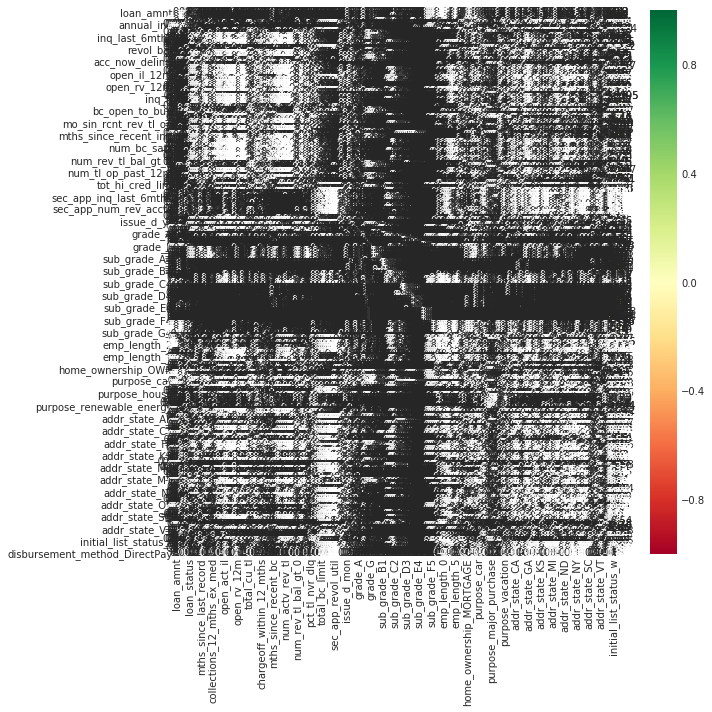

In [30]:
top_corr_features = corrmat.loc[abs(corrmat['loan_status']) > 0.1]
plt.figure(figsize=(10,10))
# sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
sns.heatmap(top_corr_features.corr(), annot=True, cmap='RdYlGn')

In [31]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations
disbursement_method_Cash     disbursement_method_DirectPay    1.0
application_type_Individual  application_type_Joint App       1.0
initial_list_status_f        initial_list_status_w            1.0
dtype: float64


In [19]:
# https://www.kaggle.com/vjgupta/reach-top-10-with-simple-model-on-housing-prices
    
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False).drop_duplicates()

with pd.option_context('display.max_rows', 1000, 'display.max_columns', 3):
  print(so)

disbursement_method_DirectPay        disbursement_method_DirectPay          1.000000e+00
loan_amnt                            funded_amnt                            9.992630e-01
funded_amnt_inv                      funded_amnt                            9.984969e-01
                                     loan_amnt                              9.976135e-01
num_actv_rev_tl                      num_rev_tl_bal_gt_0                    9.868595e-01
tot_cur_bal                          tot_hi_cred_lim                        9.810711e-01
installment                          funded_amnt                            9.546147e-01
                                     loan_amnt                              9.535064e-01
funded_amnt_inv                      installment                            9.530418e-01
sec_app_num_rev_accts                sec_app_open_acc                       9.235600e-01
all_util                             il_util                                9.002044e-01
num_sats             

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
       
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train, learner.predict(X_train), beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results